C:\Users\Jimmy Che\AppData\Local\Temp\ipykernel_15704\1452881504.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["AgeGroup", "season"])["season_judge_total"]


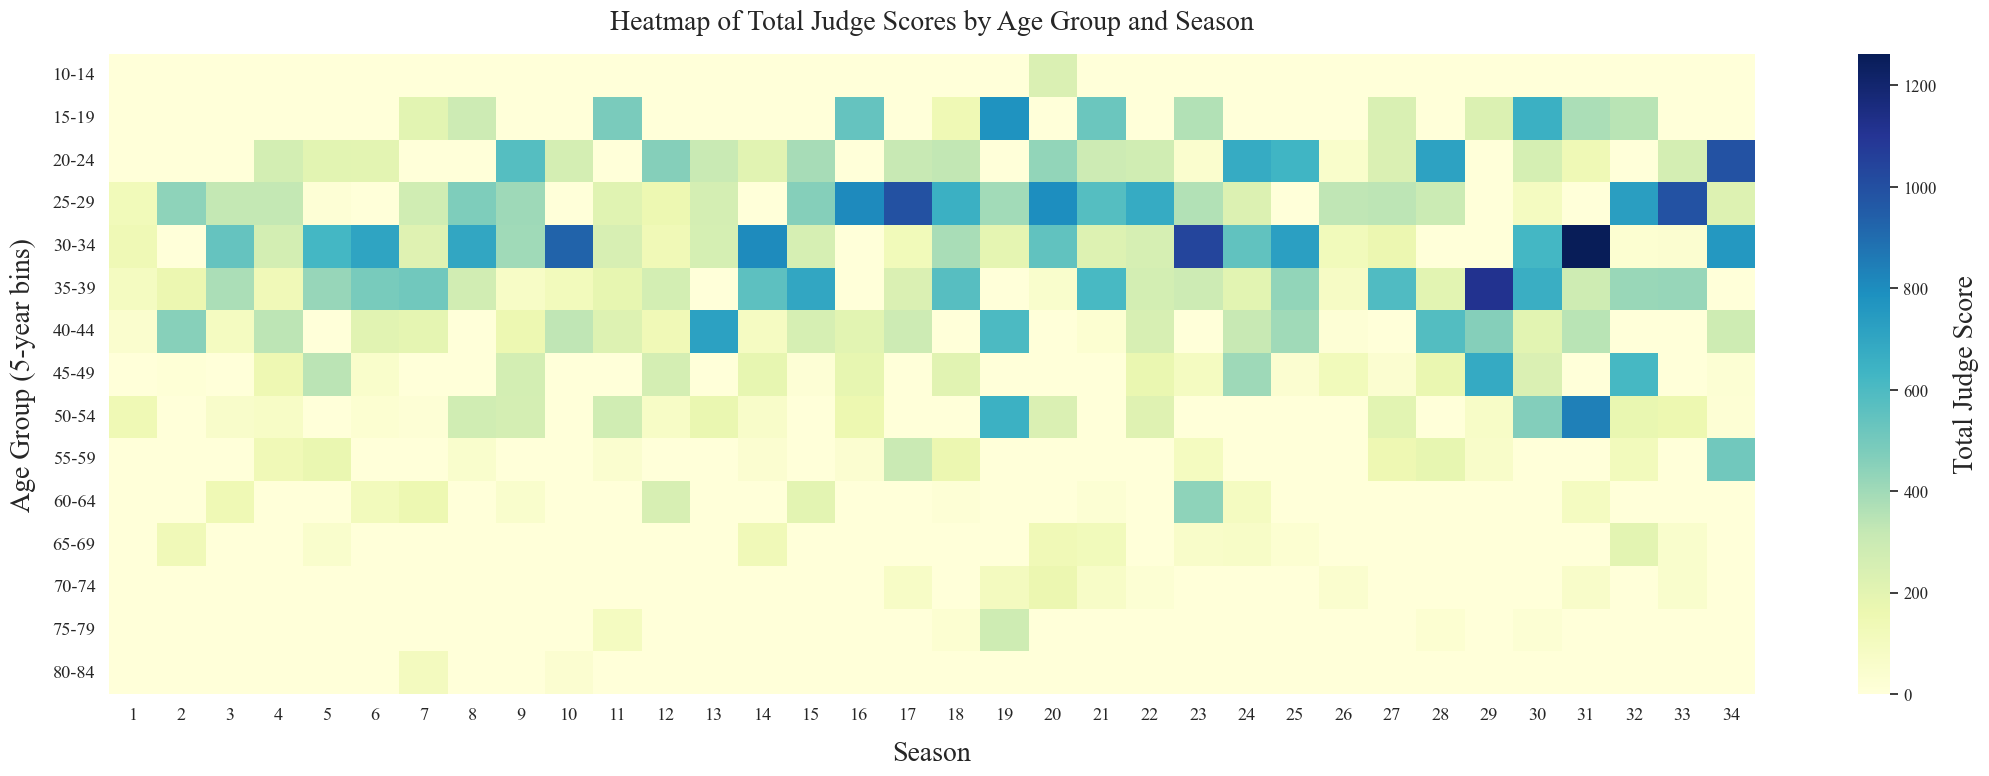

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="white", font="Times New Roman", font_scale=1.2)



df = pd.read_csv("2026_MCM_Problem_C_Data.csv")

judge_cols = [c for c in df.columns if "judge" in c and "score" in c]
df["season_judge_total"] = df[judge_cols].sum(axis=1, skipna=True)

df = df.dropna(subset=["celebrity_age_during_season"])
df = df[df["season_judge_total"] > 0]

labels = [f"{b}-{b+4}" for b in bins[:-1]]

df["AgeGroup"] = pd.cut(
    df["celebrity_age_during_season"],
    bins=bins,
    labels=labels,
    right=False
)

heat = (
    df.groupby(["AgeGroup", "season"])["season_judge_total"]
      .sum()
      .reset_index()
      .pivot(index="AgeGroup", columns="season", values="season_judge_total")
      .fillna(0)
)

from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(22, 8))
ax = sns.heatmap(
    heat,
    cmap="YlGnBu",

    cbar_kws={"label": "Total Judge Score"},
    linewidths=0,
    linecolor=None

)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Total Judge Score", fontsize=20, labelpad=12)




plt.xlabel("Season", fontsize=20, labelpad=12)
plt.ylabel("Age Group (5-year bins)", fontsize=20, labelpad=12)
plt.title("Heatmap of Total Judge Scores by Age Group and Season", fontsize=20, pad = 18)



plt.tight_layout()

plt.savefig(
)


plt.show()


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv(csv_path)

judge_cols = [c for c in df.columns if ("judge" in c and "score" in c)]
df["season_judge_total"] = df[judge_cols].sum(axis=1, skipna=True)

df = df.dropna(subset=["celebrity_age_during_season"])
df = df[df["season_judge_total"] > 0].copy()

bins = list(range(10, 90, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]

df["AgeGroup"] = pd.cut(
    df["celebrity_age_during_season"],
    bins=bins,
    labels=labels,
    right=False
)

df = df.dropna(subset=["AgeGroup"])

heat = (
    df.groupby(["AgeGroup", "season"])["season_judge_total"]
      .sum()
      .reset_index()
      .pivot(index="AgeGroup", columns="season", values="season_judge_total")
      .fillna(0)
)

sns.set_theme(style="white")

cmap = LinearSegmentedColormap.from_list(
    "white_to_orange",
    ["#ffffff", "#fff5eb", "#fdd0a2", "#f16913", "#a63603"]
)

plt.figure(figsize=(22, 8))
sns.heatmap(
    heat,
    cmap=cmap,
    cbar_kws={"label": "Total Judge Score (sum across season)"},
    linewidths=0
)

plt.xlabel("Season")
plt.ylabel("Age Group (5-year bins)")
plt.title("Heatmap (0=White → High=Orange): Total Judge Scores by Age Group and Season")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/2026_MCM_Problem_C_Data.csv'